In [1]:
!nvidia-smi

Thu Mar  6 09:49:43 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.120                Driver Version: 550.120        CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:31:00.0 Off |                    0 |
| N/A   32C    P8             11W /   72W |       1MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/home/ubuntu/projects/sure-football-analysis


In [3]:
# !pip install -q ultralytics roboflow

In [4]:
from roboflow import Roboflow
# from google.colab import userdata
from IPython.display import Image

In [5]:
from dotenv import load_dotenv

env_path = f"{HOME}/.env"
load_dotenv(dotenv_path=env_path)
ROBOFLOW_API_KEY = os.environ.get("ROBOFLOW_API_KEY")


In [6]:
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(12)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


In [7]:
!sed -i 's|\(train: \).*|\1../train/images|' {dataset.location}/data.yaml
!sed -i 's|\(val: \).*|\1../valid/images|' {dataset.location}/data.yaml

## Model Training

In [8]:
import torch

# Check CUDA availability
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device count: {torch.cuda.device_count()}")
    print(f"CUDA device name: {torch.cuda.get_device_name(0)}")
    print(f"CUDA version: {torch.version.cuda}")
    # Set default CUDA device
    torch.cuda.set_device(0)
    # Display memory information
    print(f"Total GPU memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
    print(f"Allocated GPU memory: {torch.cuda.memory_allocated(0) / 1e9:.2f} GB")
    print(f"Reserved GPU memory: {torch.cuda.memory_reserved(0) / 1e9:.2f} GB")
else:
    print("CUDA is not available. Training will use CPU only.")

CUDA available: True
CUDA device count: 1
CUDA device name: NVIDIA L4
CUDA version: 12.1
Total GPU memory: 23.57 GB
Allocated GPU memory: 0.00 GB
Reserved GPU memory: 0.00 GB


In [ ]:
# Install PyTorch with the right CUDA version
print("\nInstallation command for PyTorch with CUDA 12.x support:")
print("!pip3 install torch torchvision torchaudio --upgrade --force-reinstall --index-url https://download.pytorch.org/whl/cu121")

PyTorch CUDA version: None


In [8]:
from ultralytics import YOLO

# Load a COCO-pretrained YOLO12n model
# model = YOLO("yolo12x.pt")
model = YOLO("app/models/yolo12_football/weights/best.pt")

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data=f"{dataset.location}/data.yaml", epochs=100, imgsz=1080, batch=3,
                      device=0, project="app/models", name="yolo12_football", plots=True,
                      resume=True
                      )

New https://pypi.org/project/ultralytics/8.3.84 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22478MiB)
engine/trainer: task=detect, mode=train, model=app/models/yolo12_football/weights/best.pt, data=/home/ubuntu/projects/sure-football-analysis/football-players-detection-12/data.yaml, epochs=100, time=None, patience=100, batch=3, imgsz=1080, save=True, save_period=-1, cache=False, device=0, workers=8, project=app/models, name=yolo12_football, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=app/models/yolo12_football/weights/best.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, s

train: Scanning /home/ubuntu/projects/sure-football-analysis/football-players-detection-12/train/labels.cache... 298 images, 0 backgrounds, 0 corrupt: 100%|██████████| 298/298 [00:00<?, ?it/s]
val: Scanning /home/ubuntu/projects/sure-football-analysis/football-players-detection-12/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to app/models/yolo12_football/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 205 weight(decay=0.0), 214 weight(decay=0.0004921875), 211 bias(decay=0.0)
Resuming training app/models/yolo12_football/weights/best.pt from epoch 69 to 100 total epochs
Image sizes 1088 train, 1088 val
Using 4 dataloader workers
Logging results to app/models/yolo12_football
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      21.3G     0.7278       0.39     0.8383         24       1088: 100%|██████████| 100/100 [01:51<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.61it/s]

                   all         49       1174      0.796      0.741       0.79      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100        21G     0.7324     0.4056     0.8409         30       1088: 100%|██████████| 100/100 [01:50<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.62it/s]

                   all         49       1174       0.85       0.83      0.863      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      21.4G     0.7218     0.3894     0.8379         48       1088: 100%|██████████| 100/100 [01:51<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.61it/s]

                   all         49       1174      0.841      0.815      0.869      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      21.1G     0.7261     0.3808     0.8384         84       1088: 100%|██████████| 100/100 [01:50<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.60it/s]

                   all         49       1174      0.864      0.844      0.856      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      20.7G     0.6999     0.3652      0.837         22       1088: 100%|██████████| 100/100 [01:51<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.60it/s]

                   all         49       1174      0.873      0.854       0.88      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      21.4G      0.706     0.3679     0.8357         27       1088: 100%|██████████| 100/100 [01:51<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.60it/s]

                   all         49       1174      0.906      0.815      0.884      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      21.4G      0.695     0.3609     0.8296         24       1088: 100%|██████████| 100/100 [01:51<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.61it/s]

                   all         49       1174      0.877      0.838      0.874      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      21.3G     0.7006     0.3612      0.832         22       1088: 100%|██████████| 100/100 [01:51<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.60it/s]

                   all         49       1174      0.869      0.842      0.878      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      21.4G     0.6922     0.3608     0.8286         87       1088: 100%|██████████| 100/100 [01:51<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.60it/s]

                   all         49       1174      0.896       0.83      0.871      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      20.6G     0.6847     0.3593     0.8271         46       1088: 100%|██████████| 100/100 [01:51<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.62it/s]

                   all         49       1174      0.921      0.796      0.865      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      20.7G     0.7015     0.3674     0.8233         86       1088: 100%|██████████| 100/100 [01:51<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.62it/s]

                   all         49       1174      0.844      0.843      0.875      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      20.6G     0.7077     0.3685       0.83         64       1088: 100%|██████████| 100/100 [01:51<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.62it/s]

                   all         49       1174      0.904      0.816      0.866      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      20.6G     0.6899     0.3577     0.8319         72       1088: 100%|██████████| 100/100 [01:50<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.62it/s]

                   all         49       1174      0.928      0.824      0.881      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      21.4G     0.6695     0.3535     0.8222         14       1088: 100%|██████████| 100/100 [01:51<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.61it/s]

                   all         49       1174      0.916      0.846      0.885      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      20.7G     0.6863     0.3598     0.8293         30       1088: 100%|██████████| 100/100 [01:51<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.62it/s]

                   all         49       1174      0.871      0.853      0.876      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      20.7G     0.6824     0.3585     0.8227         29       1088: 100%|██████████| 100/100 [01:51<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.62it/s]

                   all         49       1174      0.879      0.853      0.878      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      20.7G       0.66     0.3443     0.8266         26       1088: 100%|██████████| 100/100 [01:51<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.62it/s]

                   all         49       1174      0.871      0.868      0.885      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100        21G     0.6675       0.35     0.8251         58       1088: 100%|██████████| 100/100 [01:51<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.61it/s]

                   all         49       1174      0.887       0.84      0.883      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      20.9G     0.6504     0.3365     0.8248         18       1088: 100%|██████████| 100/100 [01:51<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.61it/s]

                   all         49       1174      0.861      0.869      0.882       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100        21G     0.6644     0.3389     0.8232          2       1088: 100%|██████████| 100/100 [01:50<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.61it/s]

                   all         49       1174      0.899      0.852      0.884      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      21.3G      0.657       0.34     0.8173         16       1088: 100%|██████████| 100/100 [01:51<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.61it/s]

                   all         49       1174       0.91      0.841       0.88      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      9.54G     0.6615     0.3365     0.8273         18       1088: 100%|██████████| 100/100 [01:51<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.68it/s]

                   all         49       1174      0.901      0.848      0.884      0.638


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100        21G     0.6552     0.3263     0.8277         22       1088: 100%|██████████| 100/100 [01:50<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.61it/s]

                   all         49       1174      0.899      0.851       0.87      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      20.5G     0.6488     0.3229     0.8275         22       1088: 100%|██████████| 100/100 [01:50<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.61it/s]

                   all         49       1174      0.909      0.834      0.874      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      21.5G      0.643       0.32      0.824         23       1088: 100%|██████████| 100/100 [01:50<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.60it/s]

                   all         49       1174      0.902      0.838      0.887      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      21.3G     0.6286     0.3147     0.8224         24       1088: 100%|██████████| 100/100 [01:50<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.61it/s]

                   all         49       1174       0.94      0.822      0.889      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100        21G      0.631      0.311     0.8275         23       1088: 100%|██████████| 100/100 [01:50<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.61it/s]

                   all         49       1174      0.937      0.834      0.883      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      20.6G      0.628     0.3122     0.8217         25       1088: 100%|██████████| 100/100 [01:50<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.62it/s]

                   all         49       1174      0.916      0.841      0.889       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100        21G     0.6301     0.3136     0.8182         23       1088: 100%|██████████| 100/100 [01:50<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.61it/s]

                   all         49       1174       0.93      0.827       0.88      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      20.6G     0.6156     0.3062     0.8197         22       1088: 100%|██████████| 100/100 [01:50<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.62it/s]

                   all         49       1174      0.892      0.861      0.886      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100        21G     0.6182      0.304     0.8211         23       1088: 100%|██████████| 100/100 [01:50<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.61it/s]

                   all         49       1174      0.923      0.845      0.885      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      20.8G     0.6256     0.3085     0.8203         24       1088: 100%|██████████| 100/100 [01:50<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.63it/s]

                   all         49       1174      0.923      0.852      0.884      0.632



32 epochs completed in 1.068 hours.
Optimizer stripped from app/models/yolo12_football/weights/last.pt, 119.2MB
Optimizer stripped from app/models/yolo12_football/weights/best.pt, 119.2MB

Validating app/models/yolo12_football/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22478MiB)
YOLOv12x summary (fused): 283 layers, 59,047,964 parameters, 0 gradients, 198.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.65it/s]


                   all         49       1174      0.909      0.837      0.886      0.642
                  ball         45         45      0.854      0.467      0.602      0.267
            goalkeeper         38         39      0.887      0.923      0.977      0.751
                player         49        973      0.976      0.984      0.993      0.832
               referee         49        117      0.918      0.974      0.973       0.72
                  ball         45         45      0.854      0.467      0.602      0.267
            goalkeeper         38         39      0.887      0.923      0.977      0.751
                player         49        973      0.976      0.984      0.993      0.832
               referee         49        117      0.918      0.974      0.973       0.72
Speed: 0.5ms preprocess, 100.9ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to app/models/yolo12_football


In [9]:
import ultralytics
from ultralytics.utils.downloads import safe_download
ultralytics.checks()

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22478MiB)
Setup complete ✅ (4 CPUs, 15.0 GB RAM, 28.7/122.9 GB disk)
Setup complete ✅ (4 CPUs, 15.0 GB RAM, 28.7/122.9 GB disk)


In [ ]:
# !git clone https://github.com/ultralytics/ultralytics
from sahi.utils.file import download_from_url
from sahi.utils.ultralytics import download_yolo11n_model

# Download YOLO11 model
model_path = "app/models/yolo12_football/weights/best.pt"
download_yolo11n_model(model_path)

In [ ]:
# Run inference with the YOLO12n model on the 'bus.jpg' image
results = model("path/to/bus.jpg")

In [17]:
%cd {HOME}

!yolo task=detect mode=train model=app/models/yolov11_football_best.pt data={dataset.location}/data.yaml batch=5 epochs=30 imgsz=1280 plots=True device=0 project=app/models name=yolo11_football_v2

/home/ubuntu/projects/sure-football-analysis


Ultralytics 8.3.78 🚀 Python-3.13.2 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22478MiB)
engine/trainer: task=detect, mode=train, model=app/models/yolov11_football_best.pt, data=/home/ubuntu/projects/sure-football-analysis/football-players-detection-12/data.yaml, epochs=30, time=None, patience=100, batch=5, imgsz=1280, save=True, save_period=-1, cache=False, device=0, workers=8, project=app/models, name=yolo11_football_v2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fa

In [10]:
import torch

# Clear cached memory on the NVIDIA GPU
torch.cuda.empty_cache()
print("Cleared NVIDIA GPU cache memory")

Cleared NVIDIA GPU cache memory


In [11]:
!ls {HOME}/runs/detect/train4/

args.yaml			 R_curve.png	      train_batch2.jpg
confusion_matrix_normalized.png  results.csv	      val_batch0_labels.jpg
confusion_matrix.png		 results.png	      val_batch0_pred.jpg
F1_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
labels_correlogram.jpg		 train_batch1.jpg     val_batch1_pred.jpg
labels.jpg			 train_batch2400.jpg  val_batch2_labels.jpg
P_curve.png			 train_batch2401.jpg  val_batch2_pred.jpg
PR_curve.png			 train_batch2402.jpg  weights


/home/ec2-user/SageMaker


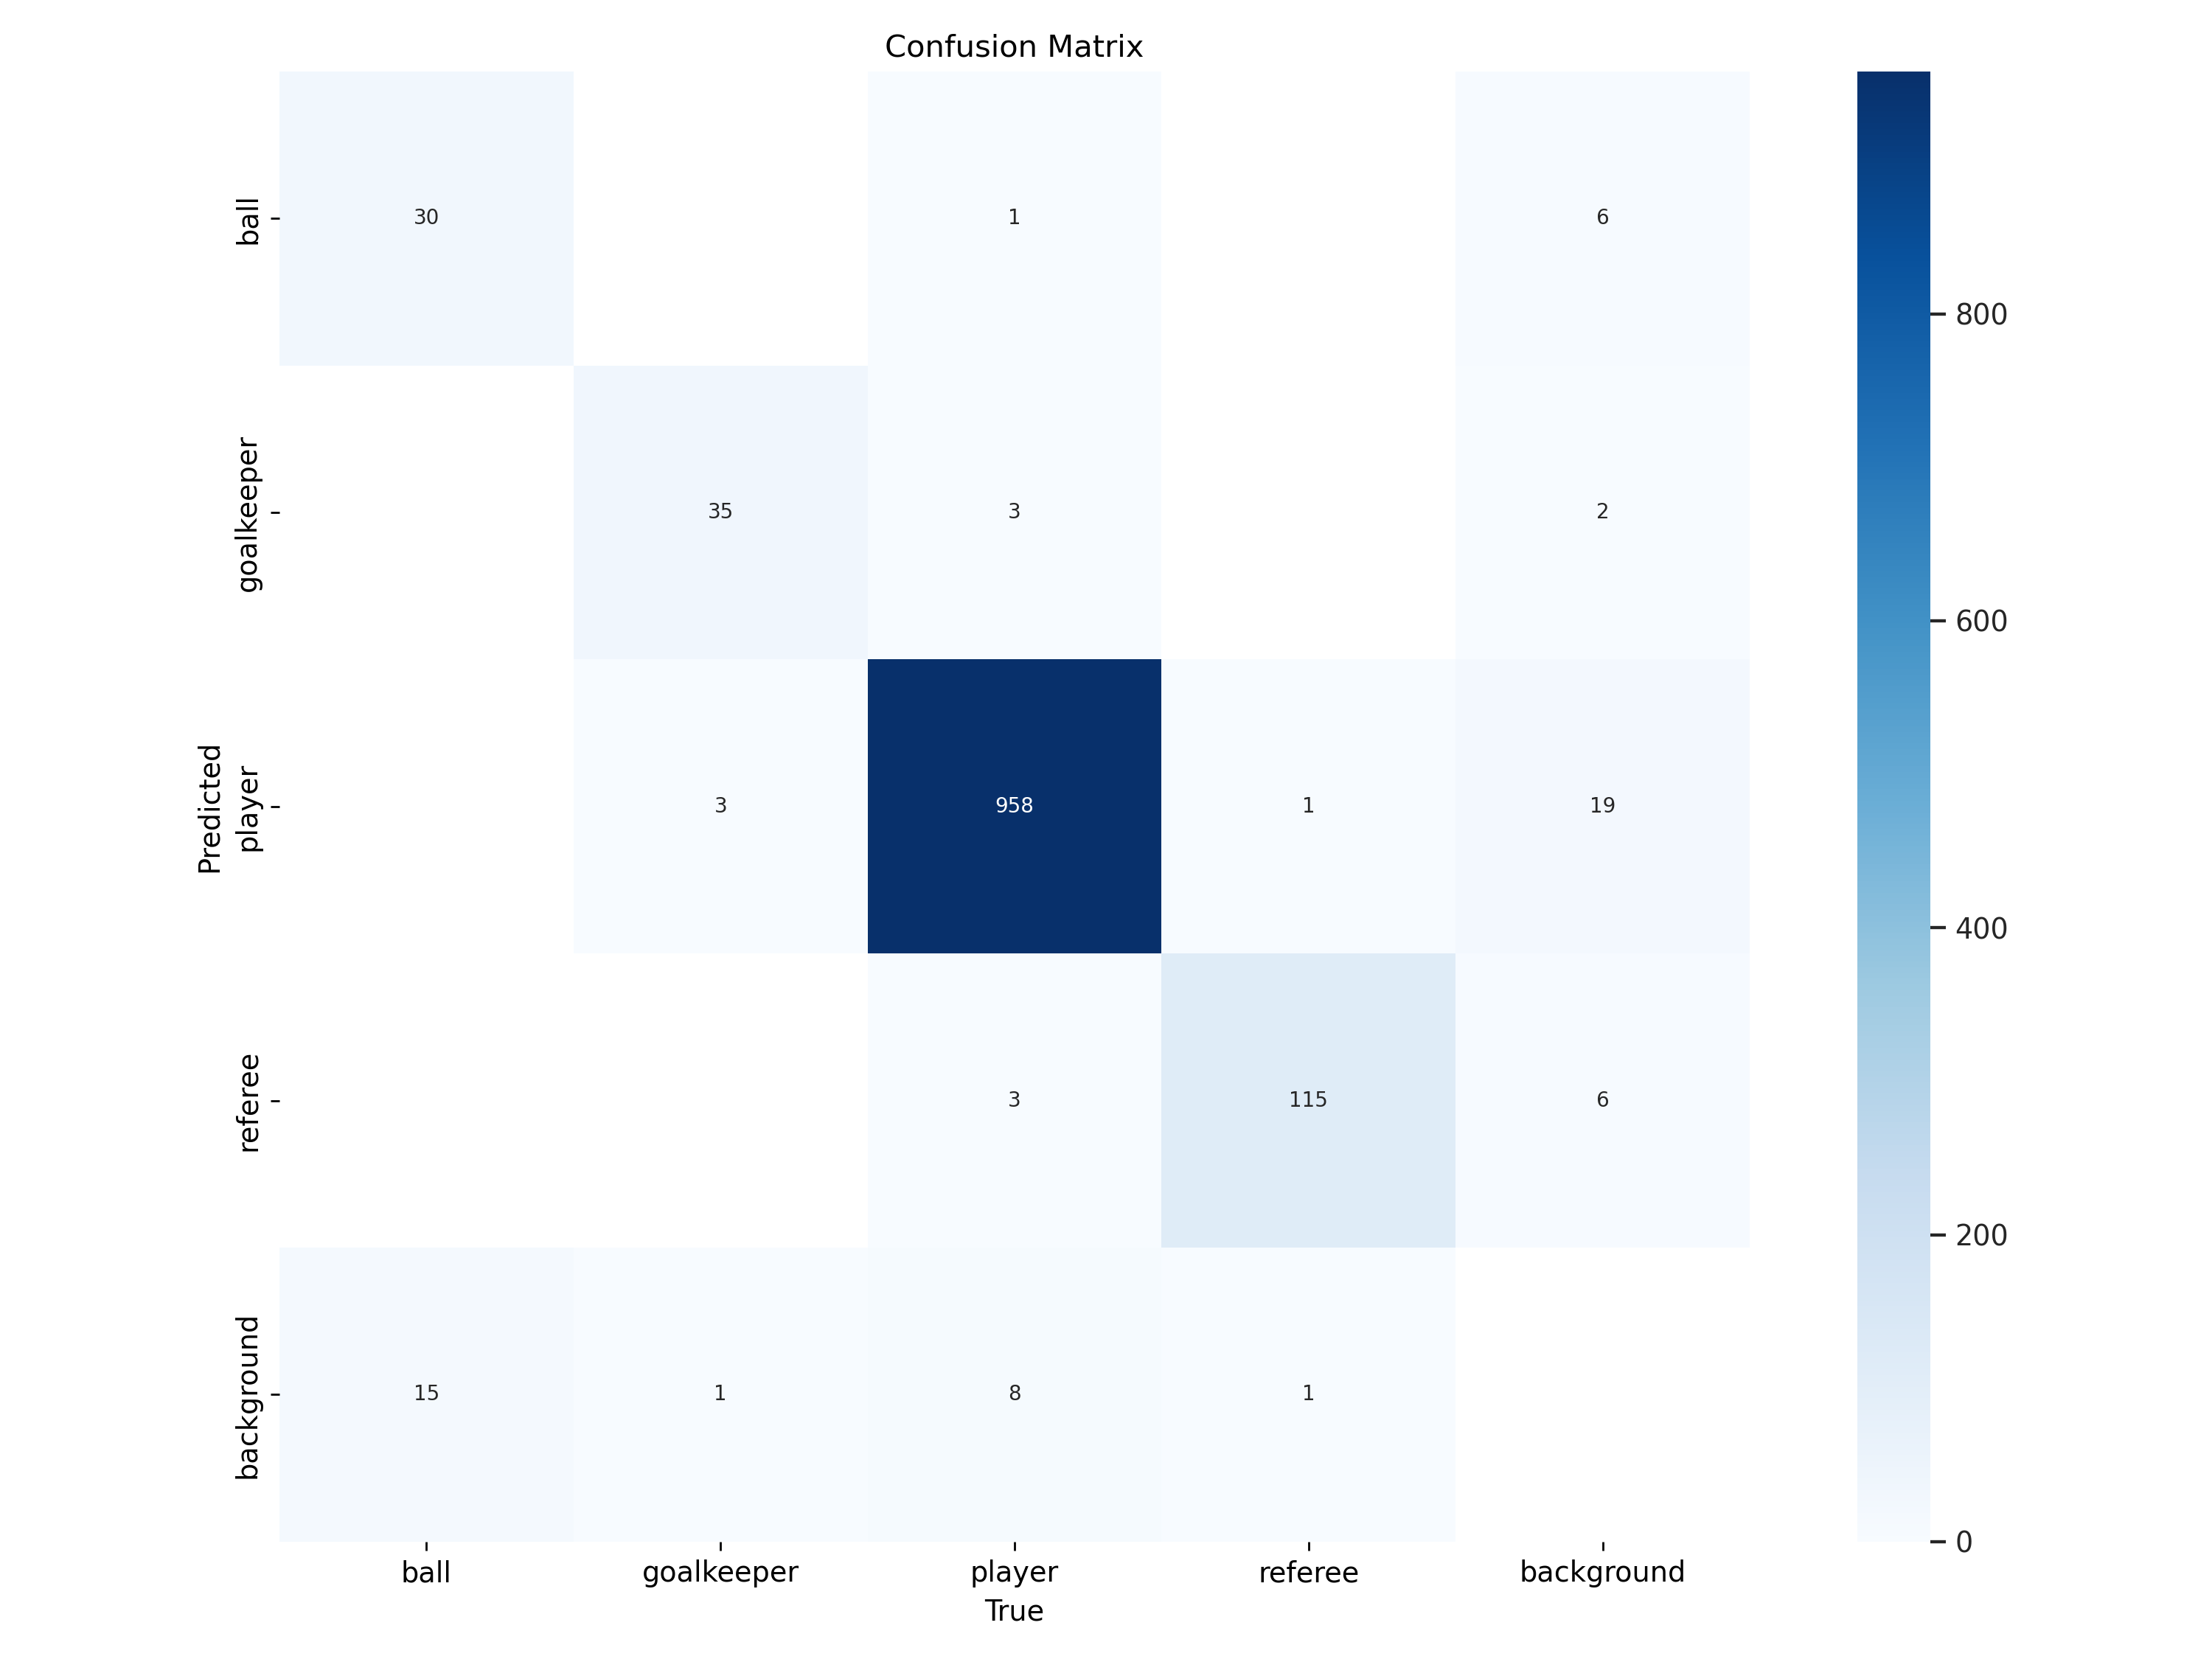

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=600)

/home/ec2-user/SageMaker


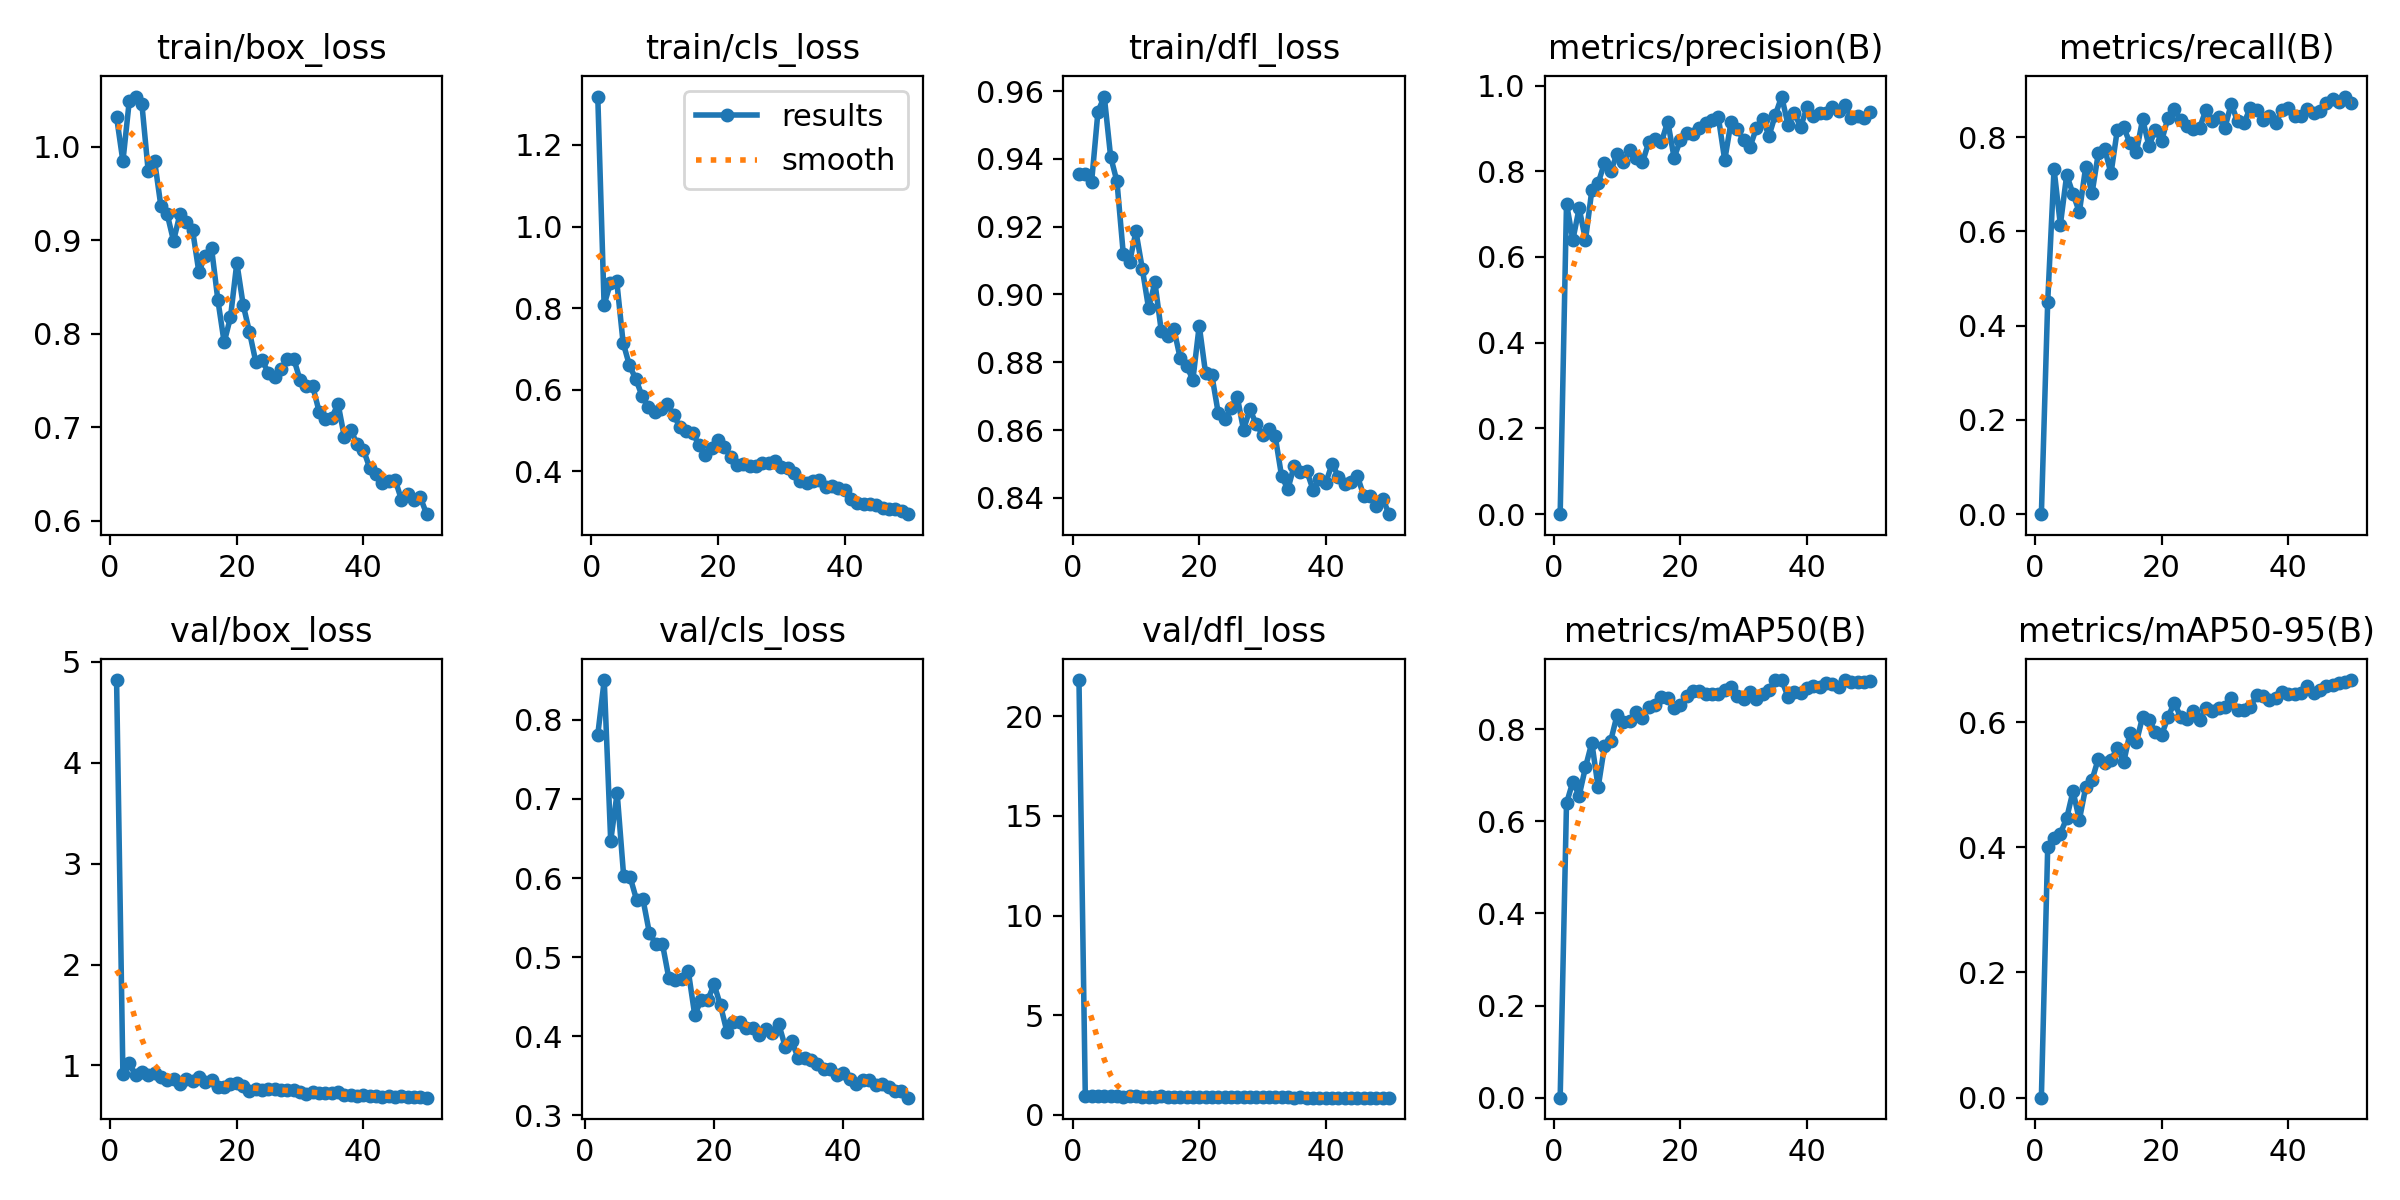

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

/home/ec2-user/SageMaker


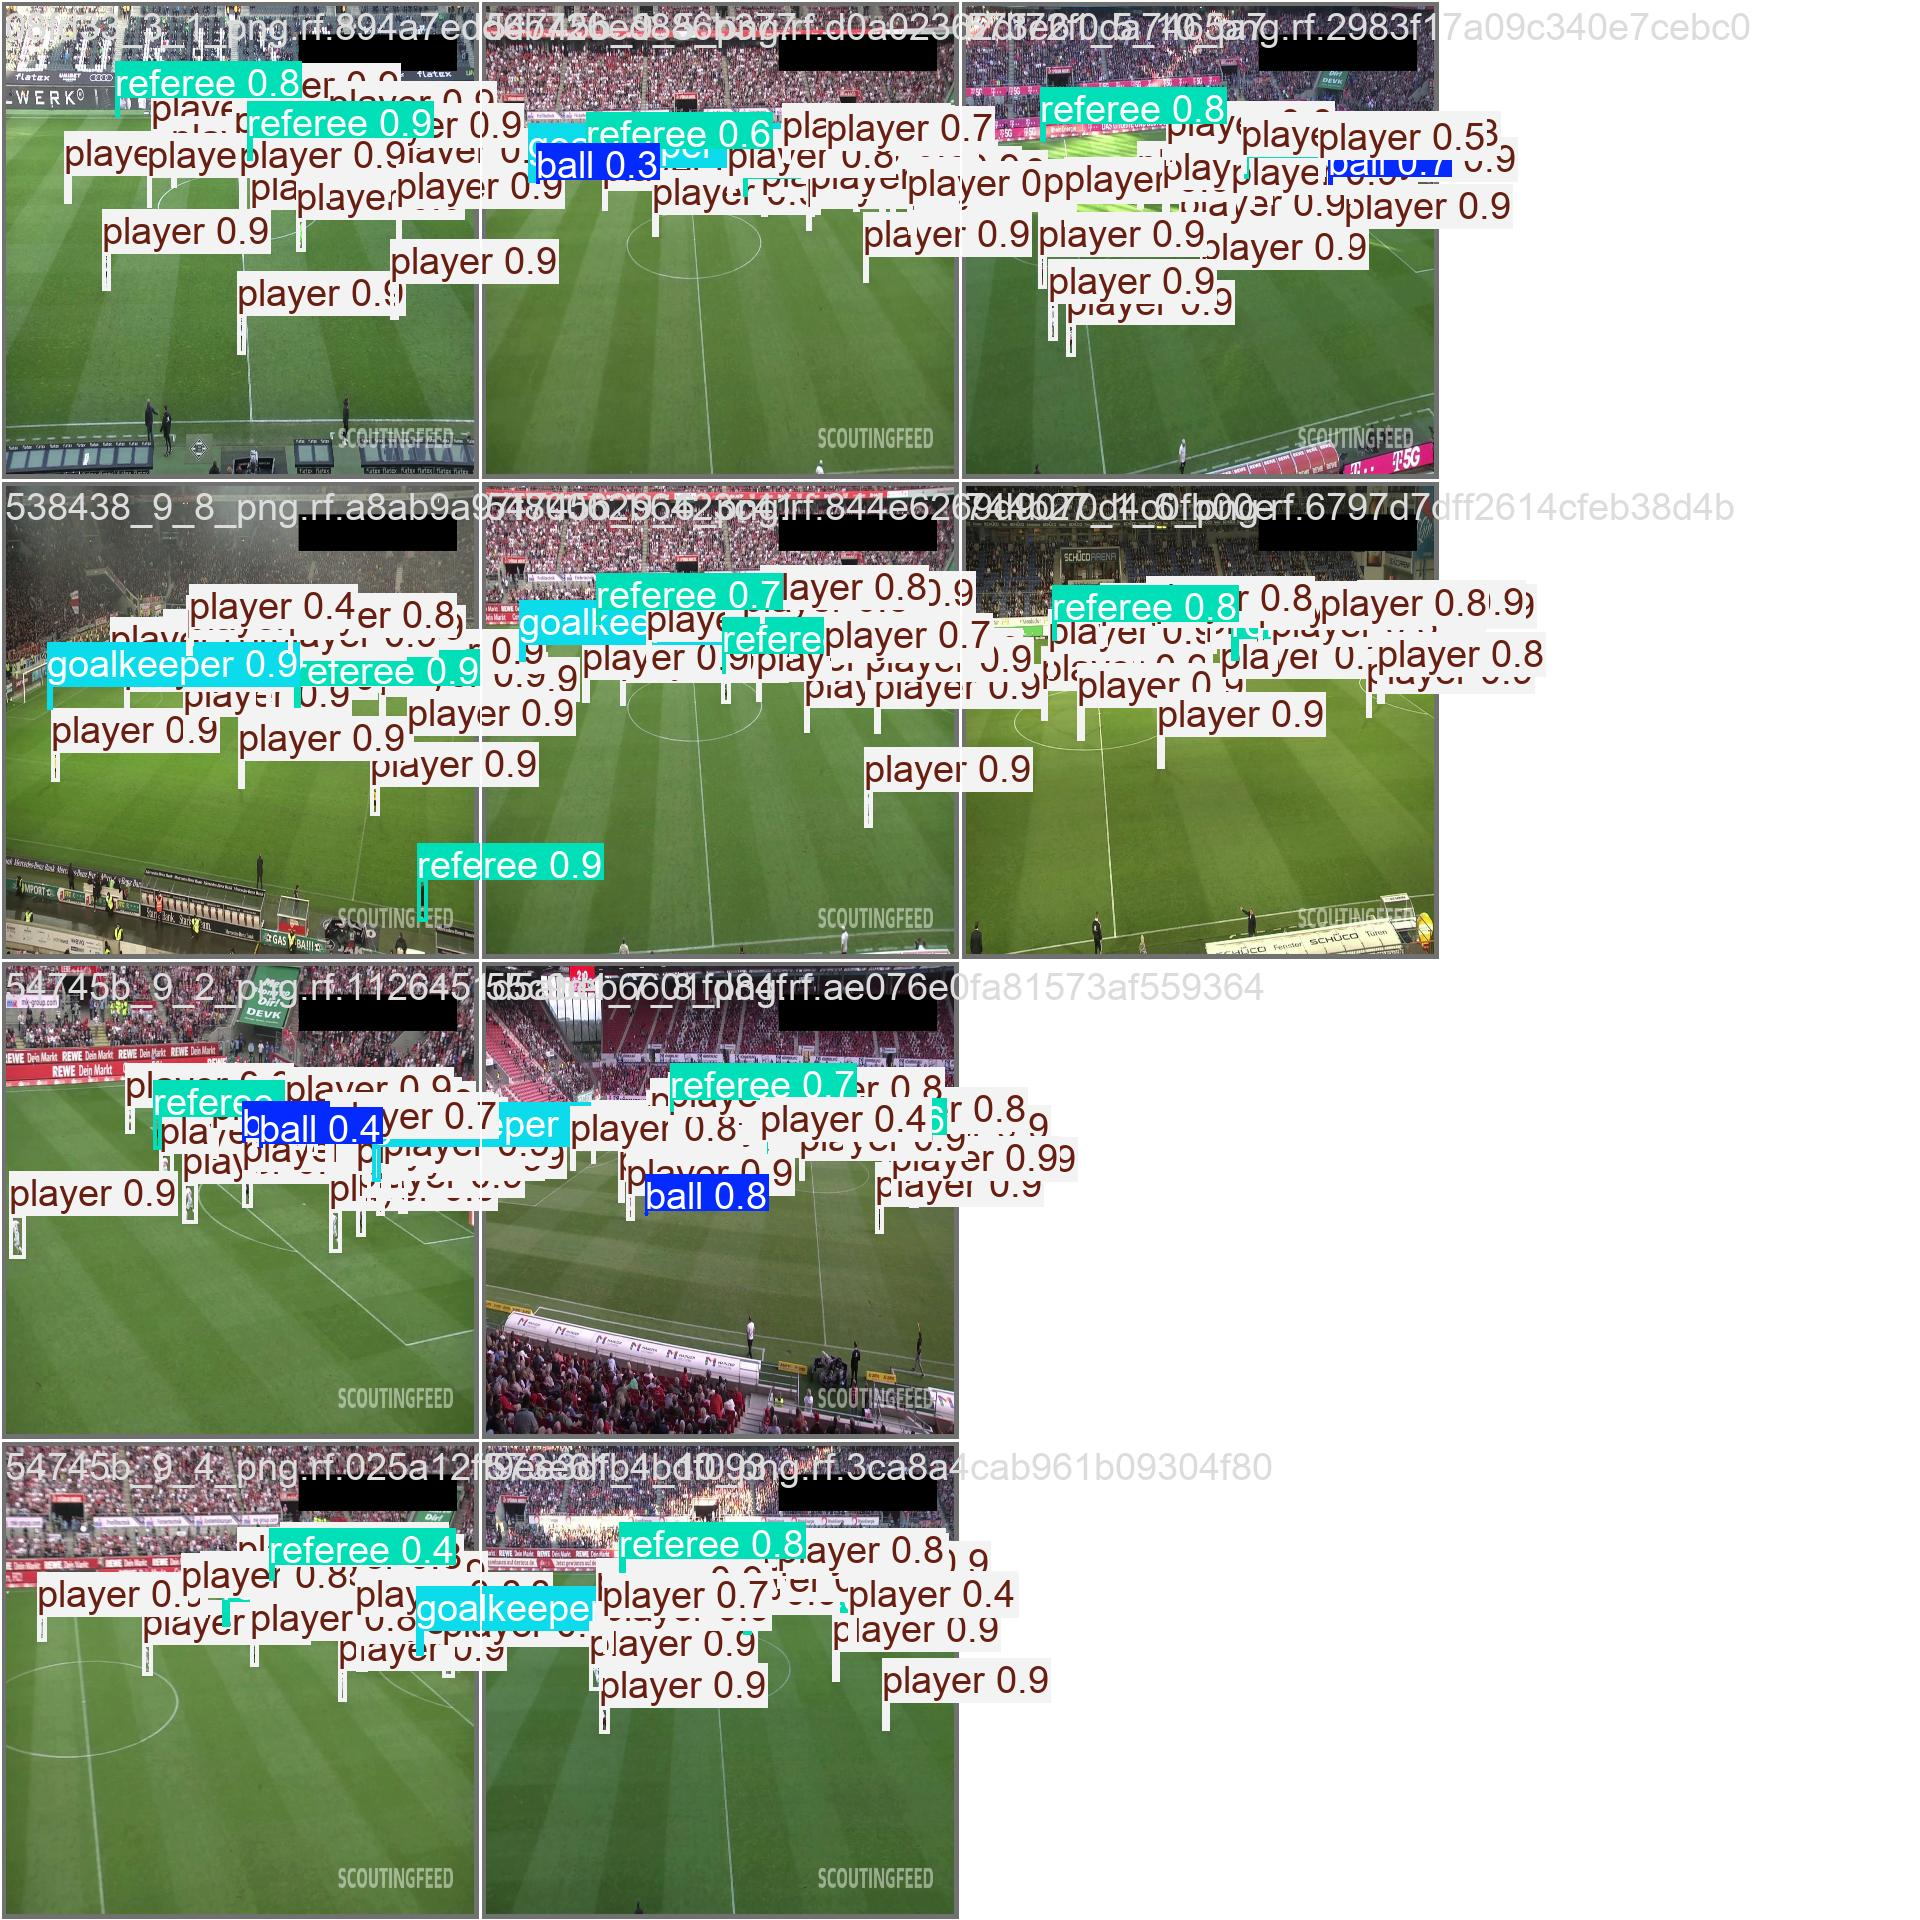

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/val_batch0_pred.jpg', width=600)

In [16]:
%%markdown
## Validation of the model

## Validation of the model


In [18]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/app/models/yolo11_football_v2/weights/best.pt data={dataset.location}/data.yaml imgsz=1280

/home/ubuntu/projects/sure-football-analysis
Ultralytics 8.3.78 🚀 Python-3.13.2 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22478MiB)
YOLO11x summary (fused): 190 layers, 56,831,644 parameters, 0 gradients, 194.4 GFLOPs
val: Scanning /home/ubuntu/projects/sure-football-analysis/football-players-dete
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         49       1174      0.949       0.86      0.903      0.671
                  ball         45         45      0.891      0.644      0.693      0.333
            goalkeeper         38         39      0.944      0.864      0.946      0.752
                player         49        973      0.986      0.984      0.993      0.859
               referee         49        117      0.974      0.947      0.979       0.74
Speed: 11.7ms preprocess, 105.3ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


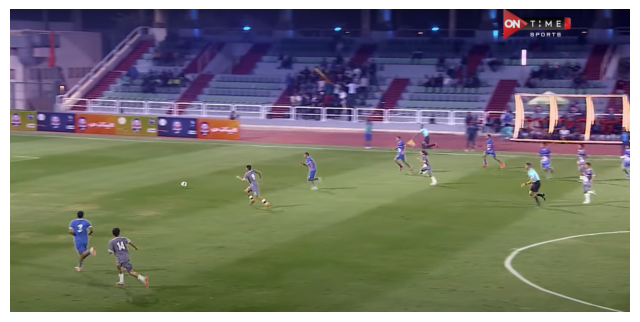

In [20]:
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to your image
img_path = "capitano_masr/ss1.png"

# Open and display the image using PIL and matplotlib
img = Image.open(img_path)
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off')  # Hide axes for a cleaner view
plt.show()


In [24]:
!yolo detect predict model={HOME}/runs/detect/train4/weights/best.pt source=capitano_masr/ss1.png imgsz=1280 conf=0.32


Ultralytics 8.3.78 🚀 Python-3.10.16 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22478MiB)
YOLO11x summary (fused): 190 layers, 56,831,644 parameters, 0 gradients, 194.4 GFLOPs

image 1/1 /home/ec2-user/SageMaker/capitano_masr/ss1.png: 640x1280 1 ball, 9 players, 1 referee, 49.7ms
Speed: 5.2ms preprocess, 49.7ms inference, 87.6ms postprocess per image at shape (1, 3, 640, 1280)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [32]:
%%markdown

## Predict on image


## Predict on image


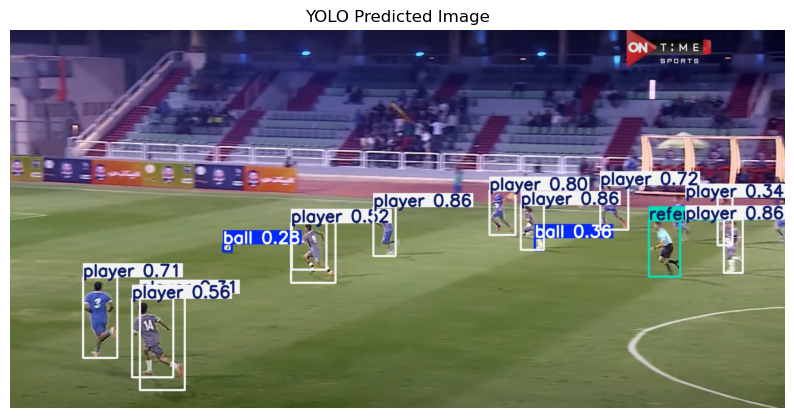

In [28]:
predicted_img_path = "runs/detect/predict/ss1.jpg"

# Open and display the predicted image
predicted_img = Image.open(predicted_img_path)
plt.figure(figsize=(10, 8))
plt.imshow(predicted_img)
plt.axis("off")  # Hide axes for a cleaner look
plt.title("YOLO Predicted Image")
plt.show()


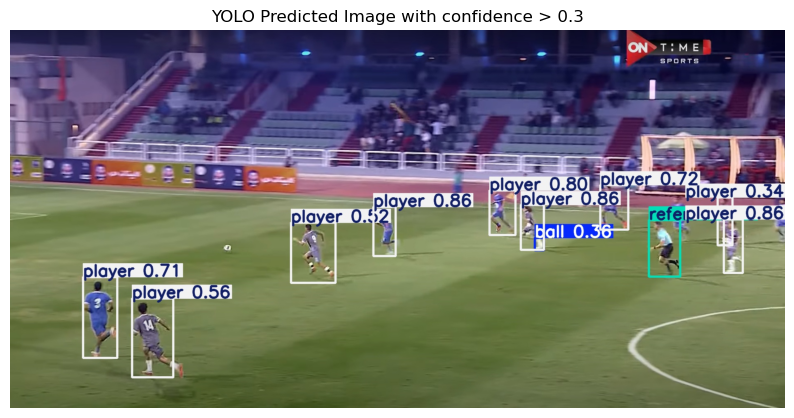

In [29]:
predicted_img_path = "runs/detect/predict2/ss1.jpg"

# Open and display the predicted image
predicted_img = Image.open(predicted_img_path)
plt.figure(figsize=(10, 8))
plt.imshow(predicted_img)
plt.axis("off")  # Hide axes for a cleaner look
plt.title("YOLO Predicted Image with confidence > 0.3")
plt.show()


In [33]:
%%markdown

## Predict on video


## Predict on video


In [ ]:
from IPython.display import Video

# Display the video with embedding enabled
video_path = "capitano_masr/sr1.mp4"
Video(video_path, embed=True, width=640, height=480)



In [34]:
!yolo detect predict model={HOME}/runs/detect/train4/weights/best.pt source=capitano_masr/sr1.mp4 imgsz=1280 conf=0.32


Ultralytics 8.3.78 🚀 Python-3.10.16 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22478MiB)
YOLO11x summary (fused): 190 layers, 56,831,644 parameters, 0 gradients, 194.4 GFLOPs

video 1/1 (frame 1/367) /home/ec2-user/SageMaker/capitano_masr/sr1.mp4: 640x1280 1 player, 50.3ms
video 1/1 (frame 2/367) /home/ec2-user/SageMaker/capitano_masr/sr1.mp4: 640x1280 1 player, 28.4ms
video 1/1 (frame 3/367) /home/ec2-user/SageMaker/capitano_masr/sr1.mp4: 640x1280 1 player, 29.5ms
video 1/1 (frame 4/367) /home/ec2-user/SageMaker/capitano_masr/sr1.mp4: 640x1280 1 player, 28.6ms
video 1/1 (frame 5/367) /home/ec2-user/SageMaker/capitano_masr/sr1.mp4: 640x1280 1 player, 29.4ms
video 1/1 (frame 6/367) /home/ec2-user/SageMaker/capitano_masr/sr1.mp4: 640x1280 1 player, 28.5ms
video 1/1 (frame 7/367) /home/ec2-user/SageMaker/capitano_masr/sr1.mp4: 640x1280 1 player, 29.6ms
video 1/1 (frame 8/367) /home/ec2-user/SageMaker/capitano_masr/sr1.mp4: 640x1280 1 player, 29.2ms
video 1/1 (frame 9/367) /home/ec2-user/SageMak

In [ ]:
video_path = "runs/detect/predict3/sr1.avi"
Video(video_path, embed=True, width=640, height=480)
